********Prediction of survival outcome on Titanic Data********

In [1]:
import pandas as pd              # 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

****IMPORTING THE TITANIC DATASET train.csv************

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.describe(include=['O']) #showing the descriptive statistics of object datatype

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kenyon, Mrs. Frederick R (Marion)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
df_train.isnull().sum() #count the missing or null value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df_train.shape

(891, 12)

In [9]:
df_test=pd.read_csv('test.csv')

In [10]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [11]:
df_test.shape

(418, 11)

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
survived=df_train[df_train['Survived']==1]
not_survived=df_train[df_train['Survived']==0]
print("Survived: %i (%.1f%%)"%(len(survived),float(len(survived))/len(df_train)*100.0))
print("Not Survived: %i (%.1f%%)"%(len(not_survived),float(len(not_survived))/len(df_train)*100.0))
print("Total: %i"%len(df_train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


********Data Visualization********

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

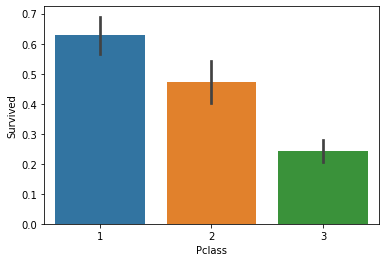

In [15]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

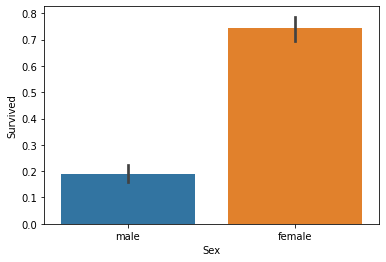

In [16]:
sns.barplot(x='Sex',y='Survived',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

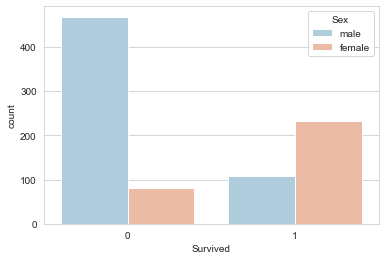

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

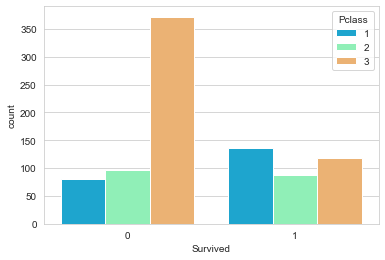

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

**How does the overall age distribution looks like?**********************

<AxesSubplot:title={'center':'Age histogram of the passanger'}, xlabel='Age of the passanger', ylabel='Count'>

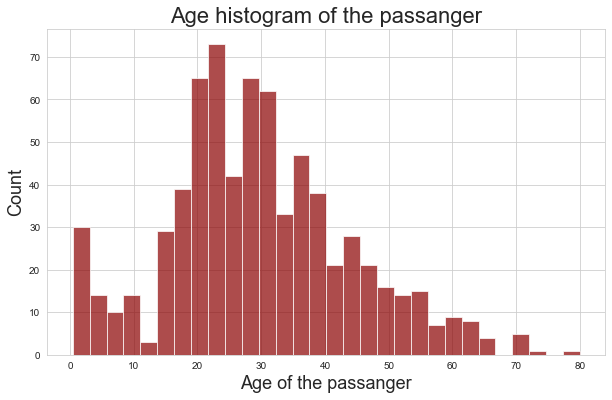

In [19]:
plt.xlabel("Age of the passanger",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passanger",fontsize=22)
df_train['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

**How does the age difference looks within the Passanger classes?
It looks like that the average age is different for three classes and it generally decreases from 1st class to 3rd class.**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

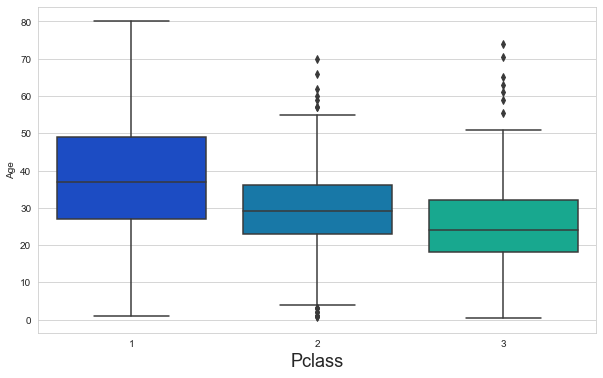

In [20]:
plt.figure(figsize=(10,6))
plt.xlabel("Passanger class",fontsize=18)
plt.xlabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

**Embarked vs Survived**

In [21]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df_train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [23]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

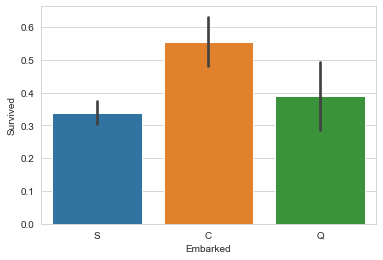

In [24]:
sns.barplot(x='Embarked',y='Survived',data=df_train) #train.groupby('Embarked').Survived.mean().plot(kind='bar')

**Parch vs Survived**

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

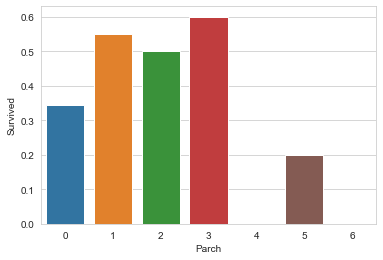

In [25]:
sns.barplot(x='Parch',y='Survived',ci=None,data=df_train) #ci=None will hide the error bar

**Data wrangling (impute and drop )
i) Impute age (by averaging) ii) Drop unnecessary features iii) Convert categorical features to dummy variables**

Text(0.5, 0, 'Passenger Class')

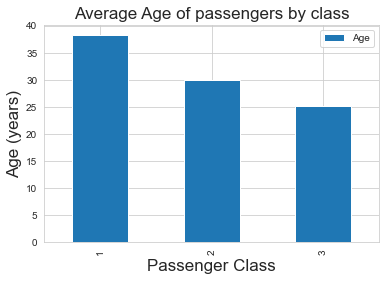

In [26]:
f_class_Age=df_train.groupby('Pclass')['Age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Average Age of passengers by class",fontsize=17)
plt.ylabel("Age (years)",fontsize=17)
plt.xlabel("Passenger Class",fontsize=17)

**Define a function to impute (fill up missing values) age feature**

In [27]:
a=list(f_class_Age['Age'])
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return a[0]
        elif Pclass==2:
            return a[1]
        else:
            return a[2]
    else:
        return Age

Text(0.5, 1.0, 'Bar plot of the count of numberic features')

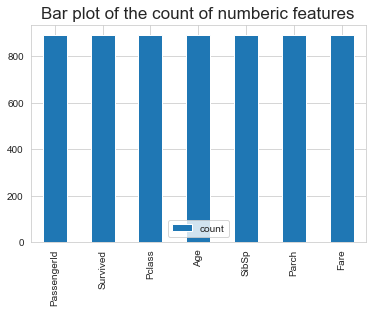

In [28]:
df_train['Age']=df_train[['Age','Pclass']].apply(impute_age,axis=1)
d=df_train.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numberic features",fontsize=17)

**Drop Cabin and any other null value**

In [29]:
df_train.drop('Cabin',axis=1,inplace=True)
df_train.dropna(inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
df_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Convert categorical feature like 'Sex' and 'Embarked' to dummy variables**

In [31]:
sex=pd.get_dummies(df_train['Sex'],drop_first=True)
embark=pd.get_dummies(df_train['Embarked'],drop_first=True)

In [32]:
df_train.drop(['Sex','Embarked'],axis=1,inplace=True)
df_train=pd.concat([df_train,sex,embark],axis=1)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


******Apply Logistic Regression Algorithm******

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train.drop('Survived',axis=1),
                                               df_train['Survived'],test_size=0.10,
                                               random_state=111)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
import statsmodels.api as sm 
# building the model and fitting the data 
log_reg = sm.Logit(y_train, X_train).fit() 

# printing the summary table 
print(log_reg.summary()) 


Optimization terminated successfully.
         Current function value: 0.500968
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  800
Model:                          Logit   Df Residuals:                      792
Method:                           MLE   Df Model:                            7
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                  0.2456
Time:                        10:31:02   Log-Likelihood:                -400.77
converged:                       True   LL-Null:                       -531.25
Covariance Type:            nonrobust   LLR p-value:                 1.288e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.0129      0.089     -0.145      0.885      -0.187       0.161
Age            0.0040      0.

In [37]:
params = log_reg.params
conf = log_reg.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

              5%       95%  Odds Ratio
Pclass  0.829596  1.174789    0.987218
Age     0.992334  1.015861    1.004029
SibSp   0.624270  0.913030    0.754968
Parch   0.739630  1.169957    0.930234
Fare    1.011710  1.024300    1.017986
male    0.080759  0.168037    0.116493
Q       0.700571  2.987992    1.446825
S       0.846231  2.128078    1.341956


(array([1.04418753e+02, 2.55970116e+00, 1.36225381e+00, 5.86437698e+00,
        5.85734118e+01, 3.06791476e+02, 2.61759067e-05, 1.75011279e+01]),
 array([4.03998746e-23, 1.10015107e-01, 2.43495899e-01, 1.56722727e-02,
        5.65342217e-14, 2.27996560e-58, 9.95919128e-01, 3.18993130e-05]))

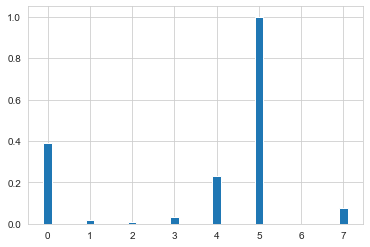

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

X=df_train.drop('Survived',axis=1)
X_indices = np.arange(X.shape[-1])
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')
f_classif(X_train, y_train)

In [39]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.00000,1,0,7.2500,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0
2,3,26.00000,0,0,7.9250,0,0,1
3,1,35.00000,1,0,53.1000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,1,0,1
887,1,19.00000,0,0,30.0000,0,0,1
888,3,25.14062,1,2,23.4500,0,0,1
889,1,26.00000,0,0,30.0000,1,0,0


In [40]:
clf.score(X_train,y_train)

0.80125

In [41]:
clf.score(X_test,y_test)

0.8764044943820225

In [42]:
log_reg.predict(X_test)

374    0.432348
212    0.157533
259    0.702783
584    0.126515
508    0.200964
         ...   
120    0.259409
841    0.163827
5      0.172603
658    0.174032
443    0.648560
Length: 89, dtype: float64

In [43]:
y_pred=clf.predict(X_test)

In [44]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1], dtype=int64)

****Confusion Matrix****

Here, you can see the confusion matrix of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output 51 and 27 are actual predictions, while 2 and 9 are incorrect predictions.

In [45]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[51,  2],
       [ 9, 27]], dtype=int64)

<AxesSubplot:>

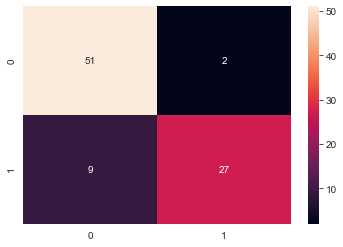

In [46]:
sns.heatmap(cnf_matrix,annot=True)

Precision: Precision is about being precise i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted passanger are going to survive or not, that patients have 90% of the time.
Recall: If there are patients who have survived in the test set and your Logistic Regression model can identify it 75% of the time.

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.8764044943820225
Precision: 0.9310344827586207
Recall: 0.75


In [48]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50)
model=clf.fit(X_train,y_train)

In [49]:
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cnf=confusion_matrix(y_pred,y_test)

In [50]:
cnf

array([[48,  7],
       [ 5, 29]], dtype=int64)

<AxesSubplot:>

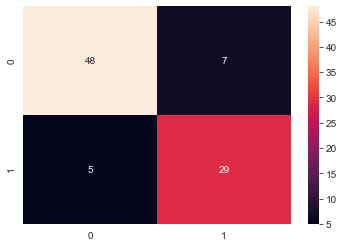

In [51]:
sns.heatmap(cnf,annot=True)

In [52]:
classificationreport=classification_report(y_pred,y_test)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        55
           1       0.81      0.85      0.83        34

    accuracy                           0.87        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.87      0.87      0.87        89



In [53]:
acc=accuracy_score(y_pred,y_test)
acc

0.8651685393258427

********ROC Curve********

Receiver Operating Characteristic (ROC) Curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

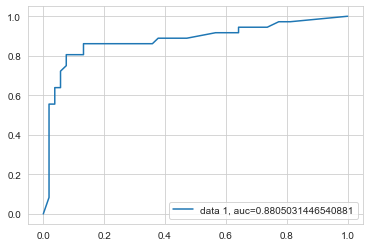

In [55]:
y_pred_proba=clf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()